# Rainfall Analysis

Two files are attached which contain daily rainfall data over India for 2010 and 2011. Both of them contain a 357x122 matrix (XR1 and XR) an a binary vector (ZR1 and ZR). The matrices contain rainfall amounts at 357 locations over India, on each day during the monsoon seasons of 2010 and 2011 (122 days from 1 June to 30 September). ZR1 and ZR are binary vectors which classify every day as 'rainy" (1) or non-rainy (0) based on the rainfall across the landmass.

In [1]:
# mounting drive
#from google.colab import drive

#drive.mount('/content/drive')

In [2]:
#cd drive/My Drive

In [3]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import math
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import metrics


1) Read the .mat files in Python and access the variables

In [4]:
d2010=loadmat('F:/4th yr/7th sem/ML/labs/2010rainfall.mat')
d2010.keys()

dict_keys(['__header__', '__version__', '__globals__', 'XR1', 'ZR1'])

In [5]:
d=[]
for i in range(122):
  d.append(i+1)
l=[]
for i in range(357):
  l.append(i+1)
train=pd.DataFrame(data=d2010['XR1'],index=l,columns=d)
train

,1,2,3,4,5,6,7,8,9,10,...,113,114,115,116,117,118,119,120,121,122
1,0.000000,0.000000,0.000000,0.000000,0.000000,13.246254,67.325218,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,13.200000,67.599998,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.467299,10.927622,0.000000,0.000000,18.999964,27.752983,2.414766,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.469477,6.805963,0.000000,0.000000,23.731779,33.303631,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.170385
5,0.000000,0.000000,6.611897,0.000000,0.000000,10.257844,56.923618,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.543626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,15.400000,22.299999,3.600000,18.700003,5.200000,34.400005,11.800001,9.900000,10.400001,33.800003,...,0.200000,0.0,0.1,52.299999,0.0,44.599998,28.000002,1.700000,1.700000,0.000000
354,10.266666,14.866666,2.400000,12.466667,3.466666,22.933334,7.866667,6.600000,6.933333,22.533335,...,0.133333,0.0,0.0,34.866665,0.0,29.733332,18.666666,1.133333,1.133333,0.000000
355,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
356,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
train_T= train.T.copy()                
train_T

,1,2,3,4,5,6,7,8,9,10,...,348,349,350,351,352,353,354,355,356,357
1,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,13.472937,15.400000,15.404682,15.400000,7.700000,15.400000,10.266666,0.0,0.0,0.0
2,0.0,0.0,0.467299,0.469477,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,16.495338,22.299999,22.299438,22.299999,11.150000,22.299999,14.866666,0.0,0.0,0.0
3,0.0,0.0,10.927622,6.805963,6.611897,0.0,0.0,16.4,15.209424,6.960495,...,2.713624,3.600000,3.600033,3.600000,1.800000,3.600000,2.400000,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,13.680507,18.700001,18.699162,18.700001,9.350000,18.700003,12.466667,0.0,0.0,0.0
5,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,3.861074,5.200000,5.199905,5.200000,2.600000,5.200000,3.466666,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,33.453896,44.599998,44.600006,44.599998,22.299999,44.599998,29.733332,0.0,0.0,0.0
119,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,21.157650,28.000000,28.000383,27.999998,13.999999,28.000002,18.666666,0.0,0.0,0.0
120,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,2.316267,1.700000,1.702536,1.700000,0.850000,1.700000,1.133333,0.0,0.0,0.0
121,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,1.393724,1.700000,1.700289,1.700000,0.850000,1.700000,1.133333,0.0,0.0,0.0


(2) Using a linear regression model to predict the rainfall XR(s,t) at any location 's' on day 't', using as predictor the rainfall at all other locations on the same day, and also rainfall at the same location on the previous 2 days [XR(1,t)....XR(s-1,t), XR(s+1,t),....XR(357,t), XR(s,t-1), XR(s,t-2)]. Using 2010 data for training.

Building such a model for s=42 (Mumbai), s=158 (Delhi), s= 299 (Kharagpur)

In [7]:
#Mumbai Feature set
X_trainM=train_T.copy()
prev1=np.zeros(122)

for i in range(121):
  prev1[i+1]=train_T[42][i+1]

prev2=[]
prev2.append(0)
prev2.append(0)
for i in range(120):
  prev2.append(train_T[42][i+1])
X_trainM['358']=prev2             #t-2 values of Mumbai
for i in range(122):
  X_trainM[42][i+1]=prev1[i]       #t-1 values of Mumbai


#Delhi Feature Set 
X_trainD=train_T.copy()
prev1=np.zeros(122)

for i in range(121):
  prev1[i+1]=train_T[158][i+1]

prev2=[]
prev2.append(0)
prev2.append(0)
for i in range(120):
  prev2.append(train_T[158][i+1])
X_trainD['358']=prev2      #t-2 values of Delhi
for i in range(122):
  X_trainD[158][i+1]=prev1[i]  #t-1 value of Delhi



#KHARAGPUR Feature set
X_trainK=train_T.copy()
prev1=np.zeros(122)
for i in range(121):
  prev1[i+1]=train_T[299][i+1]

prev2=[]
prev2.append(0)
prev2.append(0)
for i in range(120):
  prev2.append(train_T[299][i+1])
X_trainK['358']=prev2
for i in range(122):
  X_trainK[299][i+1]=prev1[i]


In [8]:
X_trainM[42]    #t-1 data of Mumbai

1       0.000000
2       0.853717
3       2.364030
4       0.000000
5       0.187683
         ...    
118    12.255814
119     0.334444
120    21.017912
121    22.394697
122    10.590665
Name: 42, Length: 122, dtype: float64

In [9]:
X_trainM['358']  #t-2 of Mumbai

1       0.000000
2       0.000000
3       0.853717
4       2.364030
5       0.000000
         ...    
118     2.061230
119    12.255814
120     0.334444
121    21.017912
122    22.394697
Name: 358, Length: 122, dtype: float64

In [10]:
X_trainM['358']

1       0.000000
2       0.000000
3       0.853717
4       2.364030
5       0.000000
         ...    
118     2.061230
119    12.255814
120     0.334444
121    21.017912
122    22.394697
Name: 358, Length: 122, dtype: float64

In [11]:
d2011=loadmat('F:/4th yr/7th sem/ML/labs/2011rainfall.mat')
d=[]                      #days
for i in range(122):
  d.append(i+1)
l=[]                       #locations
for i in range(357):
  l.append(i+1)
test=pd.DataFrame(data=d2011['XR'],index=l,columns=d)
test

,1,2,3,4,5,6,7,8,9,10,...,113,114,115,116,117,118,119,120,121,122
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,0.000000,0.000000,0.000000,21.500555,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,1.563111,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.588105,0.000000,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,34.099937,12.399961,17.000019,68.500015,6.099988,20.499962,0.0,26.000074,0.599999,1.200005,...,1.10002,1.500014,0.0,16.000111,22.800007,15.899967,0.199999,0.999997,0.0,0.0
354,34.099998,12.400000,16.999998,68.500000,6.100000,20.500000,0.0,26.000000,0.600000,1.200000,...,1.10000,1.500000,0.0,16.000000,22.799999,15.900000,0.200000,1.000000,0.0,0.0
355,34.099998,12.400000,17.000000,68.500000,6.099999,20.500000,0.0,26.000000,0.600000,1.200000,...,1.10000,1.500000,0.0,16.000000,22.799999,15.900000,0.200000,1.000000,0.0,0.0
356,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


3) Use the same model to predict the rainfall at these 3 locations on each day of 2011. Use values in XR as predictors. Compare the results with the true values and compute error for 3 locations separately.

In [12]:
test_T= test.T.copy()    #copy of tranpose of test matrix

In [13]:
#feature test set of Mumbai
X_testM=test_T.copy()
prev1=np.zeros(len(test_T))
for i in range(121):
  prev1[i+1]=test_T[42][i+1]
prev2=[]
prev2.append(0)
prev2.append(0)
for i in range(120):
  prev2.append(test_T[42][i+1])
for i in range(122):
  X_testM[42][i+1]=prev1[i]
X_testM['358']=prev2

#feature test set of Delhi
X_testD=test_T.copy()
prev1=np.zeros(len(test_T))
for i in range(121):
  prev1[i+1]=test_T[42][i+1]
prev2=[]
prev2.append(0)
prev2.append(0)
for i in range(120):
  prev2.append(test_T[158][i+1])
for i in range(122):
  X_testD[158][i+1]=prev1[i]
X_testD['358']=prev2


#feature test set of KGP
X_testK=test_T.copy()
prev1=np.zeros(len(test_T))
for i in range(121):
  prev1[i+1]=test_T[42][i+1]
prev2=[]
prev2.append(0)
prev2.append(0)
for i in range(120):
  prev2.append(test_T[299][i+1])
for i in range(122):
  X_testK[299][i+1]=prev1[i]
X_testK['358']=prev2


In [14]:
#fitting Linear Regression on 2010 training data of the 3 locations
Model = LinearRegression(fit_intercept=True)
Model = Model.fit(X_trainM, train_T[42])

Model1 = LinearRegression(fit_intercept=True)
Model1 = Model1.fit(X_trainD, train_T[158])

Model2 = LinearRegression(fit_intercept=True)
Model2 = Model2.fit(X_trainK, train_T[299])


In [15]:
#Minimumized Sum of squared residuals
SSR=np.sum((Model.predict(X_trainM)-train_T[42])**2)
SSR

1.0570302256463687e-24

In [16]:
r_sq=Model.score(X_trainM,train_T[42])
r_sq         #coefficient of determination R^2

1.0

In [17]:
PM=Model.predict(X_trainM)
PM-train_T[42]

1     -4.440892e-15
2      1.545430e-13
3      5.062617e-14
4      1.030287e-13
5     -6.217249e-14
           ...     
118   -1.065814e-14
119   -9.237056e-14
120    0.000000e+00
121    7.105427e-14
122    2.842171e-14
Name: 42, Length: 122, dtype: float64

In [18]:
Model.coef_[0]

-0.03522019471523673

Taking 2011 data as test set, fitting the model obtained from 2010 training data


In [19]:
M_pred = Model.predict(X_testM)                       #Predicted data of Mumbai2011
D_pred = Model1.predict(X_testD)                       #Predicted data of Delhi 2011
K_pred = Model2.predict(X_testK)                       #Predicted data of Kgp 2011

In [20]:
M_pred-test_T[42]                 #Difference of predicted and desired values

1      -4.334373
2     -24.502705
3     -49.858821
4     -45.996631
5       5.017116
         ...    
118     2.143386
119   -15.139162
120     2.892474
121   -12.838118
122   -23.688694
Name: 42, Length: 122, dtype: float64

In [21]:
rmse_Mumbai = math.sqrt(np.mean((M_pred -test_T[42])**2))
rmse_Delhi = math.sqrt(np.mean((D_pred -test_T[158])**2))
rmse_Kgp = math.sqrt(np.mean((K_pred -test_T[299])**2))
print("RMSE of Mumbai,Delhi,Kharapur are",rmse_Mumbai,rmse_Delhi,rmse_Kgp)

RMSE of Mumbai,Delhi,Kharapur are 36.537748602091284 22.026779001939577 22.571559248377806


(4) Repeating the same process using LASSO linear regression. Using the coefficients, identify the top 5 predictors for each of the 3 locations.


In [22]:
Mumbai=Lasso(alpha=5)
Mumbai.fit(X_trainM,train_T[42])
M_p=Mumbai.predict(X_testM)

Delhi=Lasso(alpha=5)
Delhi.fit(X_trainD,train_T[158])
D_p=Delhi.predict(X_testD)

Kharagpur=Lasso(alpha=5)
Kharagpur.fit(X_trainK,train_T[299])
K_p=Kharagpur.predict(X_testK)

In [23]:
M_p-test_T[42]                #Difference of predicted and desired test values of Mumbai

1      -0.258653
2      -2.056935
3     -45.691587
4     -35.487638
5      -0.746108
         ...    
118    -2.842840
119   -20.366338
120    -2.182179
121    -5.493607
122    -6.739123
Name: 42, Length: 122, dtype: float64

In [24]:
D_p-test_T[158]                 #Difference of predicted and desired test values of Delhi

1       7.974132
2      24.747363
3      -2.122828
4       2.655817
5       4.126399
         ...    
118    16.190841
119    -0.099875
120     0.999223
121    -0.067441
122     1.026617
Name: 158, Length: 122, dtype: float64

In [25]:
K_p-test_T[299]                  #Difference of predicted and desired test values of Kharagpur

1       9.207034
2      -6.874164
3     -13.596173
4      -0.857640
5      -8.854149
         ...    
118    -5.706010
119    -0.170579
120     0.198295
121     4.581804
122     5.863415
Name: 299, Length: 122, dtype: float64

In [26]:
rmse_Mumbai1 = math.sqrt(np.mean((M_p -test_T[42])**2))
rmse_Delhi1 = math.sqrt(np.mean((D_p -test_T[158])**2))
rmse_Kgp1 = math.sqrt(np.mean((K_p -test_T[299])**2))
print("RMSE of Mumbai,Delhi,Kharapur are",rmse_Mumbai1,rmse_Delhi1,rmse_Kgp1)

RMSE of Mumbai,Delhi,Kharapur are 33.734566388062795 18.372310399768516 18.124330301960356


In [27]:
Mumbai=Lasso(alpha=30)                       #tuned alpha to get the required sparse matrix 
Mumbai.fit(X_trainM,train_T[42])

Delhi=Lasso(alpha=40)
Delhi.fit(X_trainD,train_T[158])

Kharagpur=Lasso(alpha=50)
Kharagpur.fit(X_trainK,train_T[299])

Lasso(alpha=50, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [28]:
Mumbai.intercept_

-0.4242230730028247

In [29]:
Kharagpur.coef_

array([-0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [30]:
top5m=[]
for i in range(len(Mumbai.coef_)):
  if(Mumbai.coef_[i]>0.002):                 #0.002 is tuned minimum value of coefficients to get top 5 coeffs
    top5m.append(i)
    print("XR1(s)",i,"coef_val",Mumbai.coef_[i])
top5m  

XR1(s) 25 coef_val 0.5731359592538176
XR1(s) 40 coef_val 0.4287588507224393
XR1(s) 42 coef_val 0.003482525194005273
XR1(s) 58 coef_val 0.002753922181065696
XR1(s) 316 coef_val 0.01997278066617678


[25, 40, 42, 58, 316]

Top 5 predictors for Mumbai are XR1(25,t),XR1(40,t),XR1(316,t),XR1(42,t-1),XR1(58,t)

In [31]:
top5k=[]
for i in range(len(Kharagpur.coef_)):
  if(Kharagpur.coef_[i]>0.01):
    top5k.append(i)
    print("XR1(s)",i,"coef_val",Kharagpur.coef_[i])
top5k 

XR1(s) 161 coef_val 0.02108382311135406
XR1(s) 230 coef_val 0.026961796266756613
XR1(s) 247 coef_val 0.12122811341811984
XR1(s) 277 coef_val 0.013131056354353255
XR1(s) 304 coef_val 0.23122547319721568


[161, 230, 247, 277, 304]

So the top 5 predictors of Kharagpur are the rainfall amounts on t th day at locations s= 304,247,230,161,277

In [32]:
top5d=[]
for i in range(len(Delhi.coef_)):
  if(Delhi.coef_[i]>0.02):
    top5d.append(i)
    print("XR1(s)",i,"coef_val",Delhi.coef_[i])
top5d 

XR1(s) 25 coef_val 0.047195440654021
XR1(s) 132 coef_val 0.07157725965072836
XR1(s) 159 coef_val 0.1418689049000503
XR1(s) 161 coef_val 0.029299350573967244
XR1(s) 215 coef_val 0.0802085161638052


[25, 132, 159, 161, 215]

Top 5 predictors for Delhi are the amounts of rainfall on t th day at s=159,215,132,25,161


In [33]:
#Converting the .mat file to .csv file for better understanding of the 2010 rainfall data
df1 = pd.DataFrame() 
a,b = d2010['XR1'].shape

for i in range(a):
    XR=[]
    for j in range(b):
        XR.append(d2010['XR1'][i][j])
    df1['XR',i+1] = XR

ZR=[]
for i in range(b):
    ZR.append(d2010['ZR1'][0][i])
df1['ZR']=ZR
df1.head()

,"(XR, 1)","(XR, 2)","(XR, 3)","(XR, 4)","(XR, 5)","(XR, 6)","(XR, 7)","(XR, 8)","(XR, 9)","(XR, 10)",...,"(XR, 349)","(XR, 350)","(XR, 351)","(XR, 352)","(XR, 353)","(XR, 354)","(XR, 355)","(XR, 356)","(XR, 357)",ZR
0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,15.400000,15.404682,15.400000,7.70,15.400000,10.266666,0.0,0.0,0.0,0
1,0.0,0.0,0.467299,0.469477,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,22.299999,22.299438,22.299999,11.15,22.299999,14.866666,0.0,0.0,0.0,0
2,0.0,0.0,10.927622,6.805963,6.611897,0.0,0.0,16.4,15.209424,6.960495,...,3.600000,3.600033,3.600000,1.80,3.600000,2.400000,0.0,0.0,0.0,0
3,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,18.700001,18.699162,18.700001,9.35,18.700003,12.466667,0.0,0.0,0.0,0
4,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,5.200000,5.199905,5.200000,2.60,5.200000,3.466666,0.0,0.0,0.0,0


In [34]:
#Converting the .mat file to .csv file for better understanding of the 2011 rainfall data 
df2 = pd.DataFrame() 
a,b = d2011['XR'].shape

for i in range(a):
    XR=[]
    for j in range(b):
        XR.append(d2011['XR'][i][j])
    df2['XR',i+1] = XR

ZR=[]
for i in range(b):
    ZR.append(d2011['ZR'][0][i])
df2['ZR']=ZR
df2.head()

,"(XR, 1)","(XR, 2)","(XR, 3)","(XR, 4)","(XR, 5)","(XR, 6)","(XR, 7)","(XR, 8)","(XR, 9)","(XR, 10)",...,"(XR, 349)","(XR, 350)","(XR, 351)","(XR, 352)","(XR, 353)","(XR, 354)","(XR, 355)","(XR, 356)","(XR, 357)",ZR
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,14.400000,14.400023,33.853027,34.099995,34.099937,34.099998,34.099998,0.0,17.049999,0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,12.244545,12.400000,12.399961,12.400000,12.400000,0.0,6.200000,0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,23.200001,23.199682,17.077726,17.000000,17.000019,16.999998,17.000000,0.0,8.499999,0
3,0.0,0.0,21.500555,0.0,0.0,0.0,0.0,3.296085,0.0,0.0,...,73.500000,73.499657,68.562683,68.499992,68.500015,68.500000,68.500000,0.0,34.250000,0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,6.049290,0.0,0.0,...,2.200000,2.200939,6.051106,6.099999,6.099988,6.100000,6.099999,0.0,3.050000,0


In [35]:
#converting them to csv files
df1.to_csv('F:/4th yr/7th sem/ML/labs/2010rainfall.csv')
df2.to_csv('F:/4th yr/7th sem/ML/labs/2011rainfall.csv')

5) Use Decision Tree on 2010 data to classify each day as 1 or 0 (as given in ZR1). For each day, use the 357-dimensional rainfall vector as feature vector. Report the 10 most discriminative features (i.e. locations)

In [36]:
train=pd.read_csv('F:/4th yr/7th sem/ML/labs/2010rainfall.csv')

In [37]:
features = list(train.columns[1:358])
y_train = train["ZR"]
X_train = train[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred1=clf.predict(X_train)

In [38]:
feature_names=list(train.columns[1:358])
class_names = ['0','1']

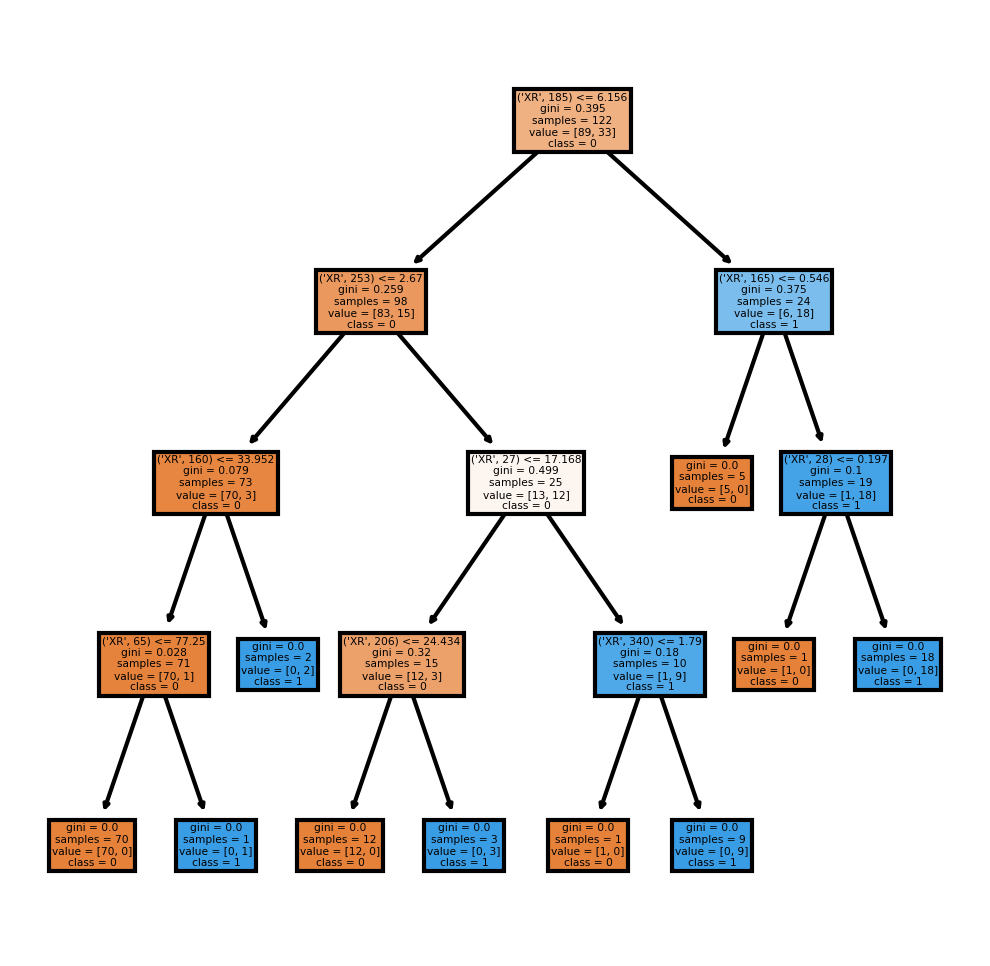

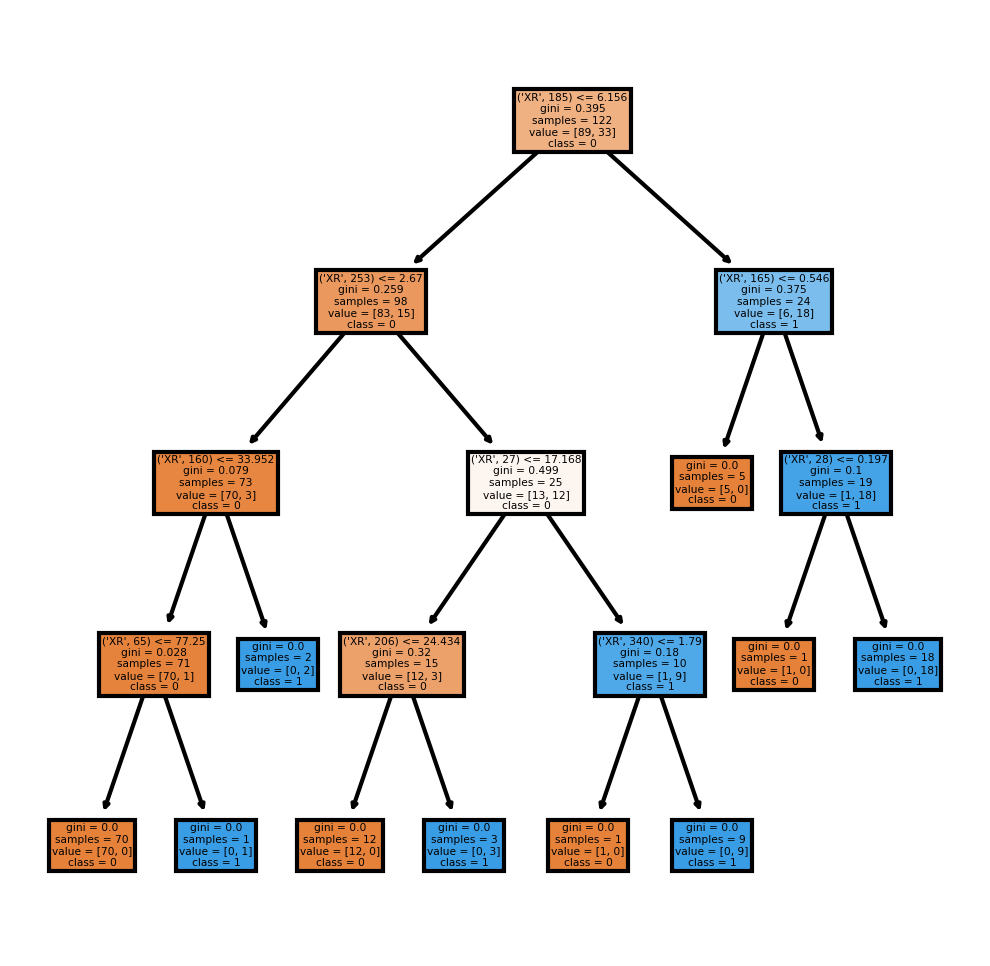

In [39]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,feature_names = feature_names, class_names=class_names ,filled = True);
fig.savefig('F:/4th yr/7th sem/ML/labs/2010DT.jpg')
fig

6) Use this Decision Tree to classify each day of 2011 as 1 or 0. Report accuracy by comparing with ZR.

In [40]:
test=pd.read_csv('F:/4th yr/7th sem/ML/labs/2011rainfall.csv')

In [41]:
features = list(test.columns[1:358])
y_test = test["ZR"]
X_test = test[features]
y_pred = clf.predict(X_test)

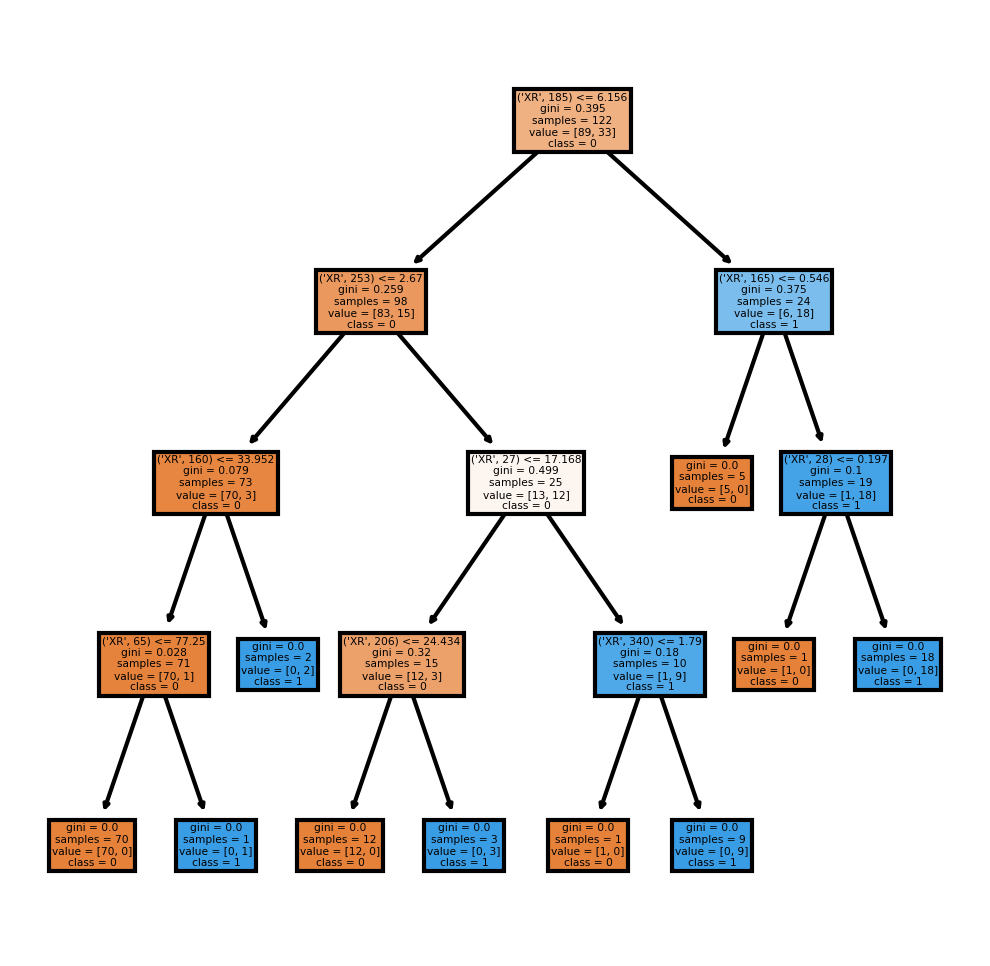

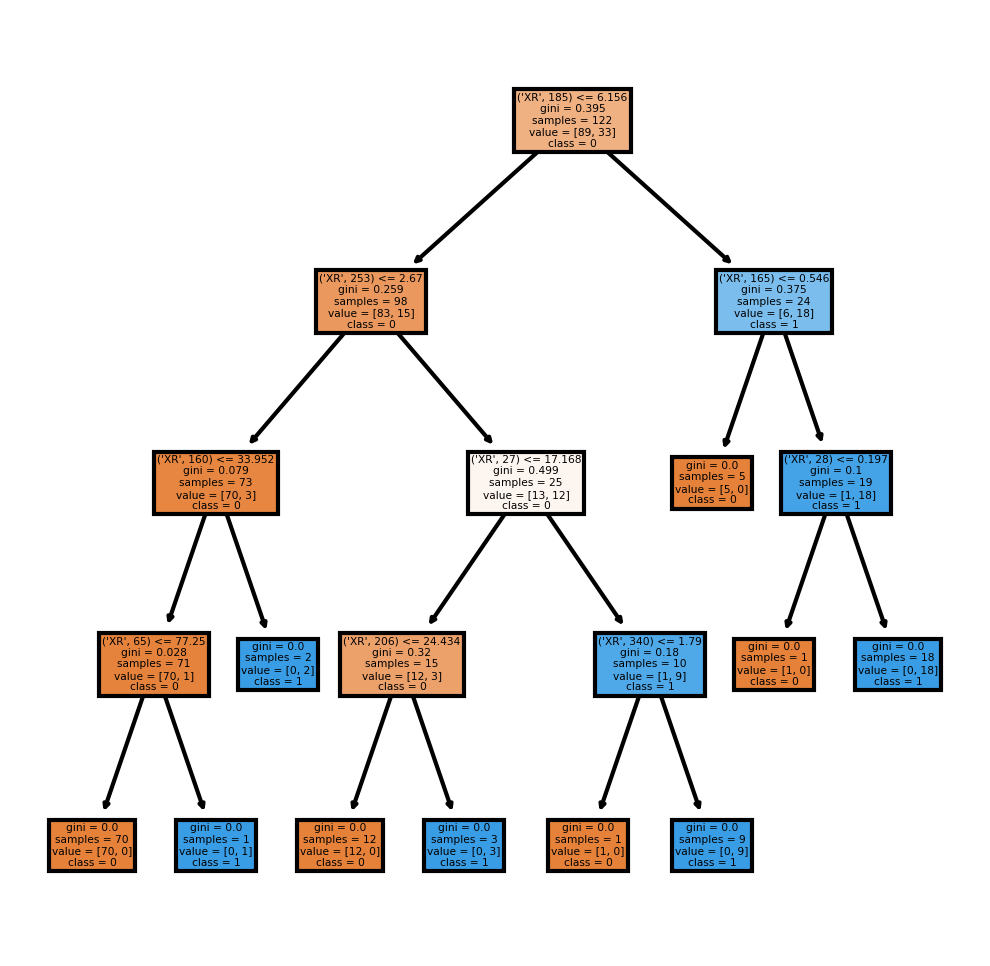

In [42]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,feature_names = feature_names, class_names=class_names ,filled = True);
fig.savefig('F:/4th yr/7th sem/ML/labs/2011DT.jpg')
fig

In [43]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7049180327868853
